<a href="https://colab.research.google.com/github/chinarbu/TeamA1_capstone/blob/main/NIDIS_Energy_TeamA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement:** </br>
###**Understanding how drought conditions correlate with electricity prices in the Northeast's electricity utilities.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as ticker
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
output_notebook()

### **Data Cleaning:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/chinarbu/TeamA1_capstone/main/NIDIS.csv?token=GHSAT0AAAAAABQYWJDRDVLMZPZ3HQAY2RICYRH72YA")
df.head()

,Year,Month,State,Revenue(Thousand $),Consumption(Megawatthours),Customers(Count),Price(Cents/kWh),Precipitation,Temperature,nat_gas_to_elect_power,PS-Wtotl,DO-WFrTo,DO-WDelv,IN-Wtotl,IR-WFrTo,IR-RecWW,IR-IrSpr,IR-IrMic,IR-IrSur,IC-WFrTo,IC-RecWW,IC-IrSpr,IC-IrMic,IC-IrSur,IG-WFrTo,IG-RecWW,IG-IrSpr,IG-IrMic,IG-IrSur,LI-WFrTo,AQ-WTotl,MI-Wtotl,PT-Wtotl,PT-RecWW,PT-PSDel,PT-Power,PO-WTotl,PO-RecWW,PO-PSDel,PO-Power,PC-WTotl,PC-RecWW,PC-PSDel,PC-Power
0,2011,1,CT,"466,863","2,780,309","1,614,219",16.79,3.36,23.2,7686.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
1,2011,2,CT,"387,663","2,390,927","1,572,803",16.21,3.84,27.1,7771.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
2,2011,3,CT,"398,719","2,436,332","1,614,558",16.37,4.74,37.0,6673.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
3,2011,4,CT,"370,989","2,260,627","1,612,808",16.41,5.52,48.9,6958.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
4,2011,5,CT,"376,033","2,300,770","1,611,524",16.34,4.87,59.7,8366.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54


In [ ]:
df1 = pd.get_dummies(df, columns=['State'])

In [ ]:
df1.columns

Index(['Year', 'Month', 'Revenue(Thousand $)', 'Consumption(Megawatthours)',
       'Customers(Count)', 'Price(Cents/kWh)', 'Precipitation', 'Temperature',
       'nat_gas_to_elect_power', 'PS-Wtotl', 'DO-WFrTo', 'DO-WDelv ',
       'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr', 'IR-IrMic', 'IR-IrSur',
       'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic', 'IC-IrSur', 'IG-WFrTo',
       'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur', 'LI-WFrTo', 'AQ-WTotl',
       'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel', 'PT-Power', 'PO-WTotl',
       'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl', 'PC-RecWW', 'PC-PSDel',
       'PC-Power', 'State_CT', 'State_MA', 'State_ME', 'State_NH', 'State_NY',
       'State_RI', 'State_VT'],
      dtype='object')

In [ ]:
df1['Consumption(Megawatthours)'] = df1['Consumption(Megawatthours)'].replace(',', '',regex=True)
df1['Customers(Count)']=df1['Customers(Count)'].replace(',','',regex=True)
df1['Revenue(Thousand $)']=df1['Revenue(Thousand $)'].replace(',','',regex=True)

In [ ]:
df1.head()

,Year,Month,Revenue(Thousand $),Consumption(Megawatthours),Customers(Count),Price(Cents/kWh),Precipitation,Temperature,nat_gas_to_elect_power,PS-Wtotl,DO-WFrTo,DO-WDelv,IN-Wtotl,IR-WFrTo,IR-RecWW,IR-IrSpr,IR-IrMic,IR-IrSur,IC-WFrTo,IC-RecWW,IC-IrSpr,IC-IrMic,IC-IrSur,IG-WFrTo,IG-RecWW,IG-IrSpr,IG-IrMic,IG-IrSur,LI-WFrTo,AQ-WTotl,MI-Wtotl,PT-Wtotl,PT-RecWW,PT-PSDel,PT-Power,PO-WTotl,PO-RecWW,PO-PSDel,PO-Power,PC-WTotl,PC-RecWW,PC-PSDel,PC-Power,State_CT,State_MA,State_ME,State_NH,State_NY,State_RI,State_VT
0,2011,1,466863,2780309,1614219,16.79,3.36,23.2,7686.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
1,2011,2,387663,2390927,1572803,16.21,3.84,27.1,7771.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
2,2011,3,398719,2436332,1614558,16.37,4.74,37.0,6673.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
3,2011,4,370989,2260627,1612808,16.41,5.52,48.9,6958.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
4,2011,5,376033,2300770,1611524,16.34,4.87,59.7,8366.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0


In [ ]:
df1['Consumption(Megawatthours)']=df1['Consumption(Megawatthours)'].astype(int)
df1['Customers(Count)']=df1['Customers(Count)'].astype(int)
df1['Revenue(Thousand $)']=df1['Revenue(Thousand $)'].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        840 non-null    int64  
 1   Month                       840 non-null    int64  
 2   Revenue(Thousand $)         840 non-null    int64  
 3   Consumption(Megawatthours)  840 non-null    int64  
 4   Customers(Count)            840 non-null    int64  
 5   Price(Cents/kWh)            840 non-null    float64
 6   Precipitation               840 non-null    float64
 7   Temperature                 840 non-null    float64
 8   nat_gas_to_elect_power      720 non-null    float64
 9   PS-Wtotl                    840 non-null    float64
 10  DO-WFrTo                    840 non-null    float64
 11  DO-WDelv                    840 non-null    float64
 12  IN-Wtotl                    840 non-null    float64
 13  IR-WFrTo                    840 non

In [ ]:
df1.isna().sum()

Year                            0
Month                           0
Revenue(Thousand $)             0
Consumption(Megawatthours)      0
Customers(Count)                0
Price(Cents/kWh)                0
Precipitation                   0
Temperature                     0
nat_gas_to_elect_power        120
PS-Wtotl                        0
DO-WFrTo                        0
DO-WDelv                        0
IN-Wtotl                        0
IR-WFrTo                        0
IR-RecWW                        0
IR-IrSpr                        0
IR-IrMic                        0
IR-IrSur                        0
IC-WFrTo                        0
IC-RecWW                        0
IC-IrSpr                        0
IC-IrMic                        0
IC-IrSur                        0
IG-WFrTo                        0
IG-RecWW                        0
IG-IrSpr                        0
IG-IrMic                        0
IG-IrSur                        0
LI-WFrTo                        0
AQ-WTotl      

In [ ]:
df1['nat_gas_to_elect_power'].fillna(int(df['nat_gas_to_elect_power'].mean()), inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        840 non-null    int64  
 1   Month                       840 non-null    int64  
 2   Revenue(Thousand $)         840 non-null    int64  
 3   Consumption(Megawatthours)  840 non-null    int64  
 4   Customers(Count)            840 non-null    int64  
 5   Price(Cents/kWh)            840 non-null    float64
 6   Precipitation               840 non-null    float64
 7   Temperature                 840 non-null    float64
 8   nat_gas_to_elect_power      840 non-null    float64
 9   PS-Wtotl                    840 non-null    float64
 10  DO-WFrTo                    840 non-null    float64
 11  DO-WDelv                    840 non-null    float64
 12  IN-Wtotl                    840 non-null    float64
 13  IR-WFrTo                    840 non

### **Exploratory Data Analysis:**

In [ ]:
df.head()

,Year,Month,State,Revenue(Thousand $),Consumption(Megawatthours),Customers(Count),Price(Cents/kWh),Precipitation,Temperature,nat_gas_to_elect_power,PS-Wtotl,DO-WFrTo,DO-WDelv,IN-Wtotl,IR-WFrTo,IR-RecWW,IR-IrSpr,IR-IrMic,IR-IrSur,IC-WFrTo,IC-RecWW,IC-IrSpr,IC-IrMic,IC-IrSur,IG-WFrTo,IG-RecWW,IG-IrSpr,IG-IrMic,IG-IrSur,LI-WFrTo,AQ-WTotl,MI-Wtotl,PT-Wtotl,PT-RecWW,PT-PSDel,PT-Power,PO-WTotl,PO-RecWW,PO-PSDel,PO-Power,PC-WTotl,PC-RecWW,PC-PSDel,PC-Power
0,2011,1,CT,"466,863","2,780,309","1,614,219",16.79,3.36,23.2,7686.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
1,2011,2,CT,"387,663","2,390,927","1,572,803",16.21,3.84,27.1,7771.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
2,2011,3,CT,"398,719","2,436,332","1,614,558",16.37,4.74,37.0,6673.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
3,2011,4,CT,"370,989","2,260,627","1,612,808",16.41,5.52,48.9,6958.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
4,2011,5,CT,"376,033","2,300,770","1,611,524",16.34,4.87,59.7,8366.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54


#### Electricity prices' trend over the years across north-east:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



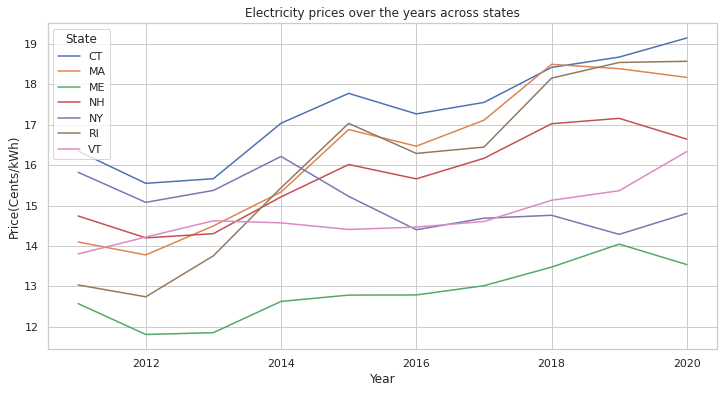

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot('Year', 'Price(Cents/kWh)', ci=None, 
             hue='State',markers= ["o","<"], data=df)
plt.title("Electricity prices over the years across states");

#### Drought conditions over the years with electricity prices:

In [ ]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

p1 = figure(title = "Distribution of Electricity prices with Precipitation",x_axis_label="Millimetres",y_axis_label="Electricity price in Cents/kWh")
p1.circle('Temperature','Price(Cents/kWh)',source=df,fill_alpha=0.1, size=10,color='blue',legend_label='Precipitation')
p2 = figure(title = "Distribution of Electricity prices with Temperature",x_axis_label="Farenheit",y_axis_label="Electricity price in Cents/kWh")
p2.circle('Precipitation','Price(Cents/kWh)',source=df,fill_alpha=0.1, size=10,color='red',legend_label='Temperature')
row2 = row([p1, p2])
#p.legend.location = "bottom_right"
show(row2);


Text(0.5, 1.0, 'Drought affecting factors')

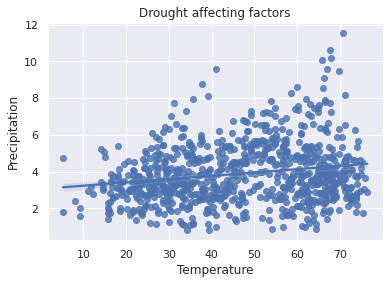

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.regplot(x="Temperature", y="Precipitation", data=df)
plt.title("Drought affecting factors")

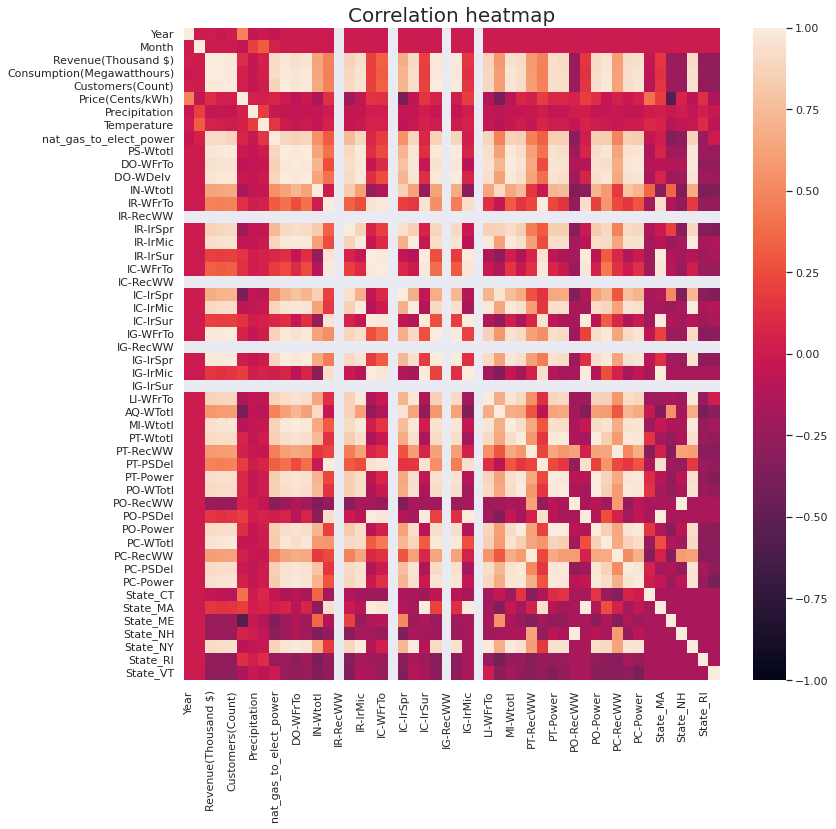

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(),vmin=-1,vmax=1, annot = False)
plt.title("Correlation heatmap", fontsize=20)
plt.show()

In [ ]:
df=df.sort_values(by='Year', ascending = False, axis=0)

In [ ]:
df.columns

Index(['Year', 'Month', 'State', 'Revenue(Thousand $)',
       'Consumption(Megawatthours)', 'Customers(Count)', 'Price(Cents/kWh)',
       'Precipitation', 'Temperature', 'nat_gas_to_elect_power', 'PS-Wtotl',
       'DO-WFrTo', 'DO-WDelv ', 'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr',
       'IR-IrMic', 'IR-IrSur', 'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic',
       'IC-IrSur', 'IG-WFrTo', 'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur',
       'LI-WFrTo', 'AQ-WTotl', 'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel',
       'PT-Power', 'PO-WTotl', 'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl',
       'PC-RecWW', 'PC-PSDel', 'PC-Power'],
      dtype='object')

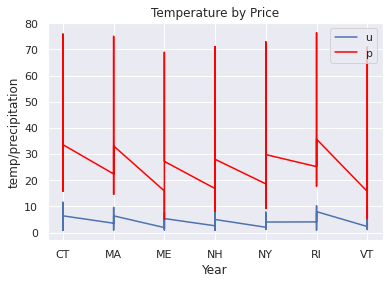

In [ ]:
plt.plot(df2.State, df2.Precipitation, label='Price', linewidth=1.5)
plt.plot(df2.State, df2.Temperature, color='red', label='Temperature', linewidth=1.5)

#add title and axis labels
plt.title('Temperature by Price')
plt.xlabel('Year')
plt.ylabel('temp/precipitation')

#add legend
plt.legend("upper left")

#display plot
plt.show() 

## DF2 - COPY OF DF

In [ ]:
years=[2018,2019,2020,2021]
#df2=df[df.Year.isin(years)]
df2=df.copy()

In [ ]:
df2['Consumption(Megawatthours)'] = df2['Consumption(Megawatthours)'].replace(',', '',regex=True)
df2['Customers(Count)']=df2['Customers(Count)'].replace(',','',regex=True)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].replace(',','',regex=True)
df2['Consumption(Megawatthours)']=df2['Consumption(Megawatthours)'].astype(int)
df2['Customers(Count)']=df2['Customers(Count)'].astype(int)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].astype(int)

In [ ]:
df2['Consumption(Megawatthours)']=round(df2['Consumption(Megawatthours)'])
df2['Revenue(Thousand $)']=round(df2['Revenue(Thousand $)'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 839 to 0
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        840 non-null    int64  
 1   Month                       840 non-null    int64  
 2   State                       840 non-null    object 
 3   Revenue(Thousand $)         840 non-null    int64  
 4   Consumption(Megawatthours)  840 non-null    int64  
 5   Customers(Count)            840 non-null    int64  
 6   Price(Cents/kWh)            840 non-null    float64
 7   Precipitation               840 non-null    float64
 8   Temperature                 840 non-null    float64
 9   nat_gas_to_elect_power      720 non-null    float64
 10  PS-Wtotl                    840 non-null    float64
 11  DO-WFrTo                    840 non-null    float64
 12  DO-WDelv                    840 non-null    float64
 13  IN-Wtotl                    840 non

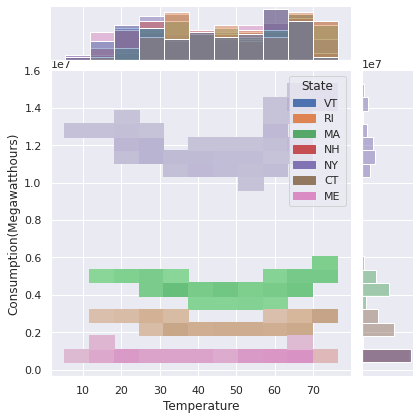

In [ ]:
sns.set_style()
sns.set(rc={'figure.figsize':(50,6)})
sns.jointplot(x="Temperature", y="Consumption(Megawatthours)",data=df2, hue="State", kind="hist")

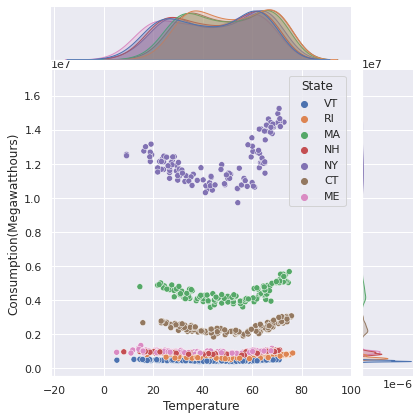

In [ ]:
#sns.set_style("fivethirtyeight")
sns.set(rc={'figure.figsize':(50,6)})
sns.jointplot(x="Temperature", y="Consumption(Megawatthours)",data=df2, hue="State")

In [ ]:
df2.groupby(by="Year", as_index=False)

In [ ]:
sns.set_style("whitegrid")
# sns.displot(data=df2, x="Customers(Count)", y="Consumption(Megawatthours)", hue="Year")
# plt.title("Consumption of electricity over years by state")
import plotly.express as px
fig = px.histogram(df2,x="Customers(Count)", y="Consumption(Megawatthours)", color="State")
fig.show()

In [ ]:
df2.columns

Index(['Year', 'Month', 'State', 'Revenue(Thousand $)',
       'Consumption(Megawatthours)', 'Customers(Count)', 'Price(Cents/kWh)',
       'Precipitation', 'Temperature', 'nat_gas_to_elect_power', 'PS-Wtotl',
       'DO-WFrTo', 'DO-WDelv ', 'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr',
       'IR-IrMic', 'IR-IrSur', 'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic',
       'IC-IrSur', 'IG-WFrTo', 'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur',
       'LI-WFrTo', 'AQ-WTotl', 'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel',
       'PT-Power', 'PO-WTotl', 'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl',
       'PC-RecWW', 'PC-PSDel', 'PC-Power'],
      dtype='object')

<Figure size 3600x432 with 0 Axes>

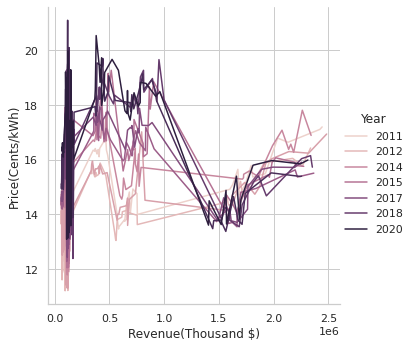

In [ ]:
plt.figure(figsize=(50,6))
sns.relplot(
    data=df2, kind="line",x = "Revenue(Thousand $)",y="Price(Cents/kWh)", 
    hue="Year", 
    facet_kws=dict(sharex=False),
)

### **Machine Learning Predictive Modelling :**

####**Linear Regression:**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
df1.columns

Index(['Year', 'Month', 'Revenue(Thousand $)', 'Consumption(Megawatthours)',
       'Customers(Count)', 'Price(Cents/kWh)', 'Precipitation', 'Temperature',
       'nat_gas_to_elect_power', 'PS-Wtotl', 'DO-WFrTo', 'DO-WDelv ',
       'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr', 'IR-IrMic', 'IR-IrSur',
       'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic', 'IC-IrSur', 'IG-WFrTo',
       'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur', 'LI-WFrTo', 'AQ-WTotl',
       'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel', 'PT-Power', 'PO-WTotl',
       'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl', 'PC-RecWW', 'PC-PSDel',
       'PC-Power', 'State_CT', 'State_MA', 'State_ME', 'State_NH', 'State_NY',
       'State_RI', 'State_VT'],
      dtype='object')

In [ ]:
X=df1.drop(columns='Price(Cents/kWh)',axis=1)
y=df1['Price(Cents/kWh)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_,model.intercept_)

[ 3.16761272e-01 -2.66680743e-03  1.37475739e-05 -2.37622243e-06
 -4.60730653e-06  5.47314756e-02 -1.54550799e-02  1.71919863e-05
  1.08746026e-02 -1.65869404e-02 -6.39628039e-03 -3.17142752e-03
  2.99191075e-02  0.00000000e+00 -3.46133926e-03 -1.15974144e-03
  2.63421003e-03  2.90904135e-02  0.00000000e+00 -3.53778946e-03
 -1.50898703e-03  2.63421003e-03  8.28694017e-04  0.00000000e+00
  7.64502049e-05  3.49245596e-04  0.00000000e+00 -4.99337319e-03
 -1.25775773e-02 -3.75913775e-03  1.67864039e-03 -1.07984753e-03
  1.21141973e-02  3.79393695e-05  1.73289348e-03 -5.55489146e-05
  1.15734988e-02 -1.95432447e-04 -5.42530893e-05 -1.02429862e-03
  5.40698482e-04  2.33371816e-04  2.70969752e-04  2.54923793e-04
 -1.52718838e-04 -3.96777961e-04 -8.46746890e-05  5.87938231e-04
 -4.79660287e-04] -621.6050829051624


In [ ]:
print('Variance score: {}'.format(model.score(X_test, y_test)))
 

Variance score: 0.8655254478636047


Text(0.5, 1.0, 'Distribution of train and test data')

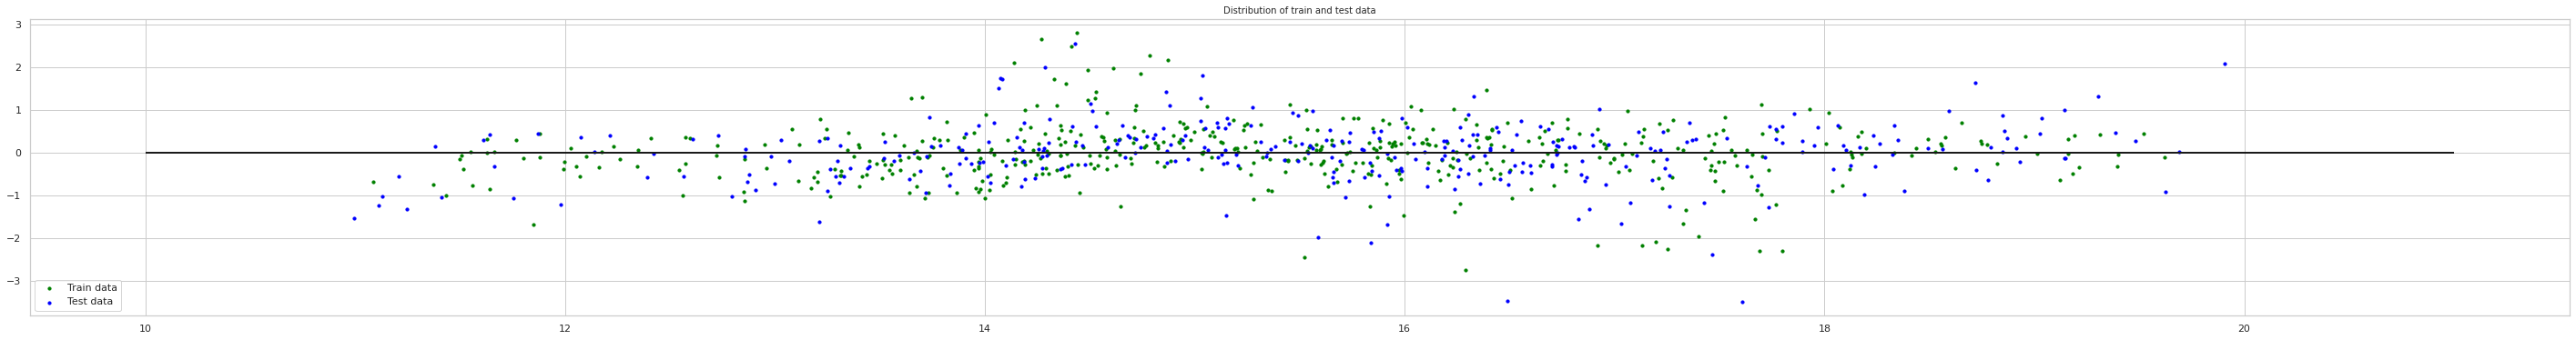

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 21, linewidth = 2)
plt.legend(loc = 'lower left')
plt.title("Distribution of train and test data", fontsize=10)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = np.round(regressor.predict(X_test))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Random Forest Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 0.47961309523809514
Mean Squared Error: 0.3730276785714286
Root Mean Squared Error: 0.6107599189300397
Random Forest Regression Score: 92.76463600333607


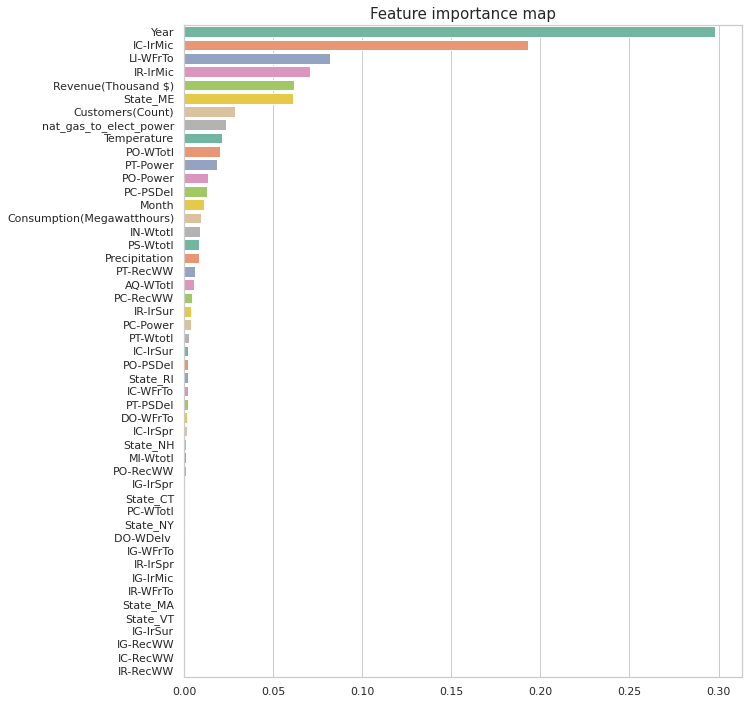

In [ ]:
# Plot features importances
import matplotlib.pyplot as plt
imp = pd.Series(data=regressor.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance map", fontsize=15)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

In [ ]:
# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [500, 1000, 2000], 'max_features': (3, 17), 
               'max_depth': (3, 20, 1)}]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': (3, 20, 1), 'max_features': (3, 17),
                          'n_estimators': [500, 1000, 2000]}],
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import mean_squared_error
rf_cv = grid_search_forest.best_estimator_
y_rf_train = rf_cv.predict(X_train)
y_rf_test = rf_cv.predict(X_test)
rf_mse_train = mean_squared_error(y_train, y_rf_train)
rf_mse_test = mean_squared_error(y_test, y_rf_test)
print('The best Random forest model from the grid search has a MSE of', round(rf_mse_test, 2))

The best Random forest model from the grid search has a MSE of 0.26


In [ ]:
# Random forest model evaluation after cv
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rf_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_test)))
print('Random Forest Regression Score:',regressor.score(X_test,y_rf_test)*100)

Mean Absolute Error: 0.37902545556973066
Mean Squared Error: 0.2623175359047737
Root Mean Squared Error: 0.5121694406197754
Random Forest Regression Score: 98.92436201563403


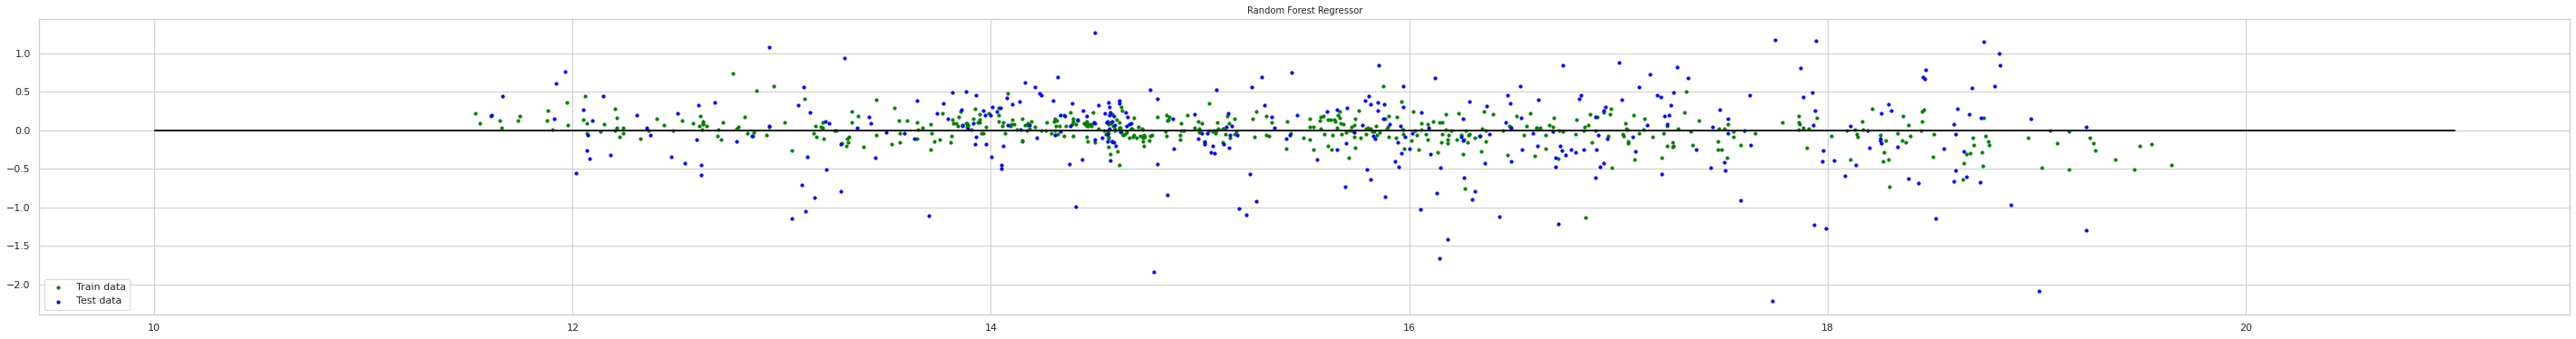

In [ ]:
plt.scatter(rf_cv.predict(X_train), rf_cv.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(rf_cv.predict(X_test), rf_cv.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 21, linewidth = 2)
plt.title("Random Forest Regressor", size=10)
plt.legend(loc = 'lower left');